In [90]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets    # import our handwriting dataset
from sklearn.neighbors import KNeighborsClassifier

In [91]:
mnist = datasets.fetch_openml('mnist_784')

In [171]:
X = mnist['data']
print(X.shape)
y = mnist['target']
print(y.shape)

"""for time sake, change number of images. else, comment out"""
X = X[:3000]
y = y[:3000]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)
(3000, 784)
(3000,)


In [172]:
mnist.data[0] # view array of first image, each number represents intensity
# print(mnist.data[0].shape)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

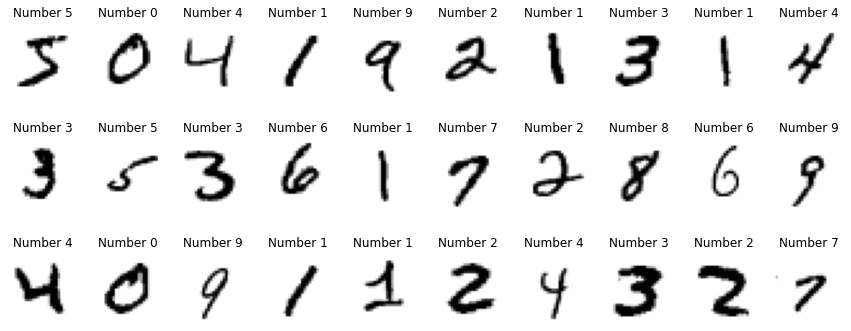

In [173]:
# plot samples

fig, ax = plt.subplots(3, 10, figsize=(15,6))
for ax, img, num in zip(ax.ravel(), X, y):
    ax.axis('off')
    ax.imshow(np.reshape(img, (28,28)), cmap = plt.cm.gray_r)
    ax.set_title('Number ' + str(num))

In [174]:
# split data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.142857, random_state=99, stratify=y)   # split test size into ratio similar to original MNIST dataset (60k train, 10k test)

In [175]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2571, 784)
(429, 784)
(2571,)
(429,)


In [183]:
from sklearn.metrics import classification_report
from sklearn import metrics

k = []
acc_results = []

def calculation(neighbors):
    for i in neighbors:
        # fit model
        knn = KNeighborsClassifier(n_neighbors=i)   # can change neighbors to see accuracy change
        knn.fit(X_train, y_train)

        # predict from test dataset
        y_pred = knn.predict(X_test)
        y_pred

        acc = metrics.balanced_accuracy_score(y_test, y_pred)   # we use balanced accuracy here instead of just accuracy because we want a better measure-- assume number of samples for each target is the same
        k.append(i)
        acc_results.append(acc)

calculation([1,2,3])

[1]
0.9200963561994208
[0.9200963561994208]
[1, 2]
0.9229342225248468
[0.9200963561994208, 0.9229342225248468]
[1, 2, 3]
0.9127396397822359
[0.9200963561994208, 0.9229342225248468, 0.9127396397822359]


[1, 2, 3] [0.9200963561994208, 0.9229342225248468, 0.9127396397822359]


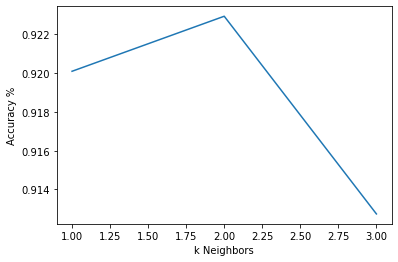

In [187]:
print(k, acc_results)
plt.plot(k, acc_results)
plt.ylabel('Accuracy %')
plt.xlabel('k Neighbors')
plt.show()

In [81]:
# # predict from test dataset
# y_pred = knn.predict(X_test)
# y_pred

array(['0', '3', '2', ..., '6', '2', '1'], dtype=object)

In [82]:
# # check accuracy
# report = classification_report(y_test, y_pred)
# print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2278
           1       0.96      1.00      0.98      2599
           2       0.98      0.97      0.97      2307
           3       0.96      0.97      0.97      2357
           4       0.98      0.97      0.97      2252
           5       0.97      0.97      0.97      2083
           6       0.98      0.99      0.99      2269
           7       0.97      0.97      0.97      2407
           8       0.99      0.93      0.96      2252
           9       0.95      0.97      0.96      2296

    accuracy                           0.97     23100
   macro avg       0.97      0.97      0.97     23100
weighted avg       0.97      0.97      0.97     23100



In [83]:
# from sklearn import metrics
# acc = metrics.balanced_accuracy_score(y_test, y_pred)   # we use balanced accuracy here instead of just accuracy because we want a better measure-- assume number of samples for each target is the same
# print('accuracy: ' + str(acc))

accuracy: 0.9727999167693966


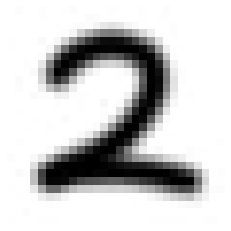

In [84]:
# test model on image not in dataset

def rgb2gray(rgb):  # function for converting to grayscale
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# feed and plot image
imgfile = 'number_28x28.jpg'
im = mpimg.imread(imgfile)
im = rgb2gray(im)
im = im/255
im=(784-im*784).astype(int)
plt.imshow(im, cmap = plt.cm.gray_r)
plt.axis('off')
plt.show()

In [85]:
im = im.reshape(1,-1)
guess = knn.predict(im)

print('The predicted number of the image [' + str(imgfile) + "] is " + str(guess) + ".")

The predicted number of the image [number_28x28.jpg] is ['2'].
